In [138]:
from platform import python_version
print(python_version())

3.9.12


In [139]:
import sklearn

In [140]:
sklearn.__version__

'1.1.2'

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as s
import warnings
warnings.filterwarnings('ignore')

In [142]:
data = pd.read_csv('laptop_data.csv')

In [143]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [144]:
data.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


- Here,we can see we have unnamed:0 column which is not significant for us in order to predict the price that's why we going delete that column.

In [145]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [146]:
data.shape

(1303, 11)

In [147]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [148]:
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [149]:
data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [150]:
round(data.describe(),3)

,Inches,Price
count,1303.000,1303.000
mean,15.017,59870.043
std,1.426,37243.202
min,10.100,9270.720
25%,14.000,31914.720
50%,15.600,52054.560
75%,15.600,79274.246
max,18.400,324954.720


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


## Data Preprocessing.

In [152]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


- From the above datasets we can understand that inches and price having desirable values.
- Whereas,inside the Ram and Weight we do have object data type and we need convert from object data type to int & float respectively.

In [153]:
data['Ram']=data['Ram'].str.replace('GB','')
data['Weight']=data['Weight'].str.replace('kg','')

In [154]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


Since,the both column have same data type that is object so we need to convert that data type to the int or float accordingly.

In [156]:
data['Ram']=data['Ram'].astype('int32')
data['Weight']=data['Weight'].astype('float32')

In [157]:
data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
dtype: object

In [158]:
data.head(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000


#### ScreenResolution

- Inside the ScreenResolution we do have lot of information and we need extract in other column so that we can get better under understanding.

In [159]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [160]:
new=data['ScreenResolution'].str.split('x',n=1,expand=True)
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [161]:
data['X_res']=new[0]
data['Y_res']=new[1]

In [162]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,IPS Panel Retina Display 2560,1600


In [163]:
data['X_res']=data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [164]:
data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
X_res                object
Y_res                object
dtype: object

In [165]:
data['X_res'] = data['X_res'].astype('int32')
data['Y_res'] = data['Y_res'].astype('int32')

In [166]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600


### Adding New Feature PPI (Pixel Per Inches)

In [167]:
data.corr()['Price']

Inches    0.068197
Ram       0.743007
Weight    0.210370
Price     1.000000
X_res     0.556529
Y_res     0.552809
Name: Price, dtype: float64

- Since we have X_res and Y_res with almost same +ve correlation value and inches not showing any significant correlation with price so I am to create new feature called PPI with the help these features.

In [168]:
data['PPI'] = (((data['X_res']**2)+(data['Y_res']**2))**0.5/data['Inches']).astype('float32')

In [169]:
data['PPI']

0       226.983002
1       127.677940
2       141.212006
3       220.534622
4       226.983002
           ...    
1298    157.350510
1299    276.053528
1300    111.935204
1301    100.454666
1302    100.454666
Name: PPI, Length: 1303, dtype: float32

In [170]:
data.corr()['Price']

Inches    0.068197
Ram       0.743007
Weight    0.210370
Price     1.000000
X_res     0.556529
Y_res     0.552809
PPI       0.473487
Name: Price, dtype: float64

- Now we are able to get the combined effect of correlation inside the PPI feature.

In [171]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600,226.983002
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080,141.212006
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800,220.534622
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600,226.983002


In [172]:
data['TouchScreen'] = data['ScreenResolution'].apply(lambda x: 1 if "Touchscreen" in x else 0)

In [173]:
data['TouchScreen']

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: TouchScreen, Length: 1303, dtype: int64

In [174]:
data['IPS'] = data['ScreenResolution'].apply(lambda x: 1 if "IPS" in x else 0)

In [175]:
data['IPS']

0       1
1       0
2       0
3       1
4       1
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: IPS, Length: 1303, dtype: int64

In [176]:
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,PPI,TouchScreen,IPS
206,Dell,Notebook,15.6,Touchscreen 1366x768,Intel Core i3 7100U 2.4GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,23389.920,1366,768,100.454666,1,0
945,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,AMD FX 8800P 2.1GHz,16,512GB SSD + 1TB HDD,AMD Radeon R9 M385,Windows 10,2.50,53226.720,1920,1080,141.212006,0,1
612,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.18,23650.992,1366,768,100.454666,0,0
644,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.40,23976.000,1366,768,100.454666,0,0
705,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.18,42357.600,1920,1080,141.212006,0,0
872,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,73952.640,1920,1080,141.212006,0,1
685,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.49,149916.600,1920,1080,141.212006,0,0
1033,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.95,63669.600,1920,1080,157.350510,0,0
852,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Linux,2.83,46087.200,1920,1080,127.335678,0,0
1171,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,2.10,61751.520,1920,1080,141.212006,0,0


- We will some correlation and pattern understanding with data till now.

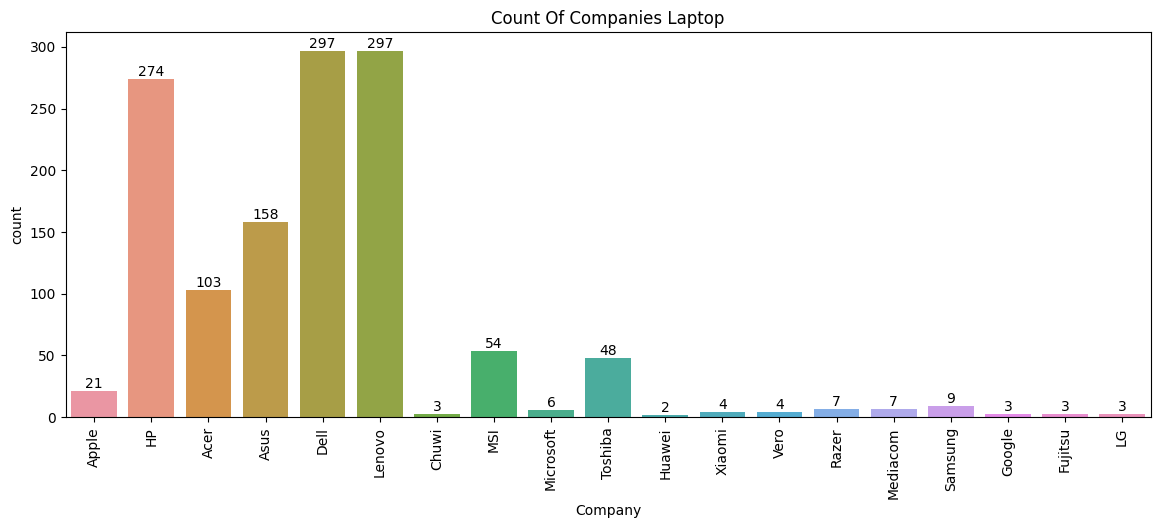

In [177]:
plt.figure(figsize=(14,5))
ax = sns.countplot(x='Company', data=data)
plt.xticks(rotation=90)
plt.title("Count Of Companies Laptop")
for container in ax.containers:
    ax.bar_label(container)

- From here we can see majority of laptops are avalible in HP,Dell,Lenovo,Asus,Acer
- Because of their price are afforable and well known brand
- Whereas Apple,samsung and google are not so much in this data sets.

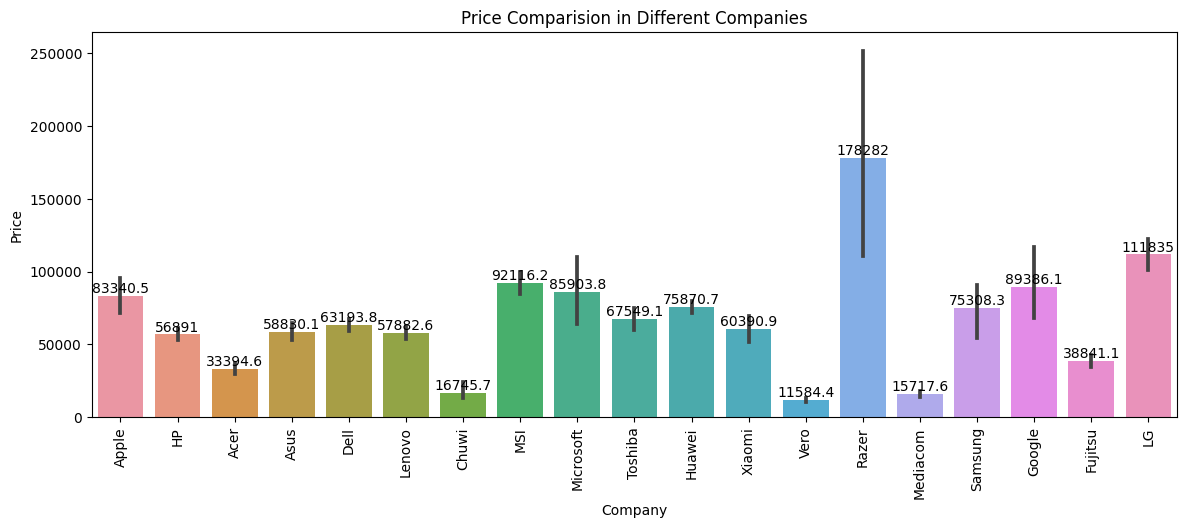

In [178]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x='Company',y='Price', data=data)
plt.xticks(rotation=90)
plt.title("Price Comparision in Different Companies")
for container in ax.containers:
    ax.bar_label(container)

- From Here, we can see that most of apple,Razer,LG,Samsung,Google,Microsoft are higher in the price as compare to the HP,Asus,Dell etc. 

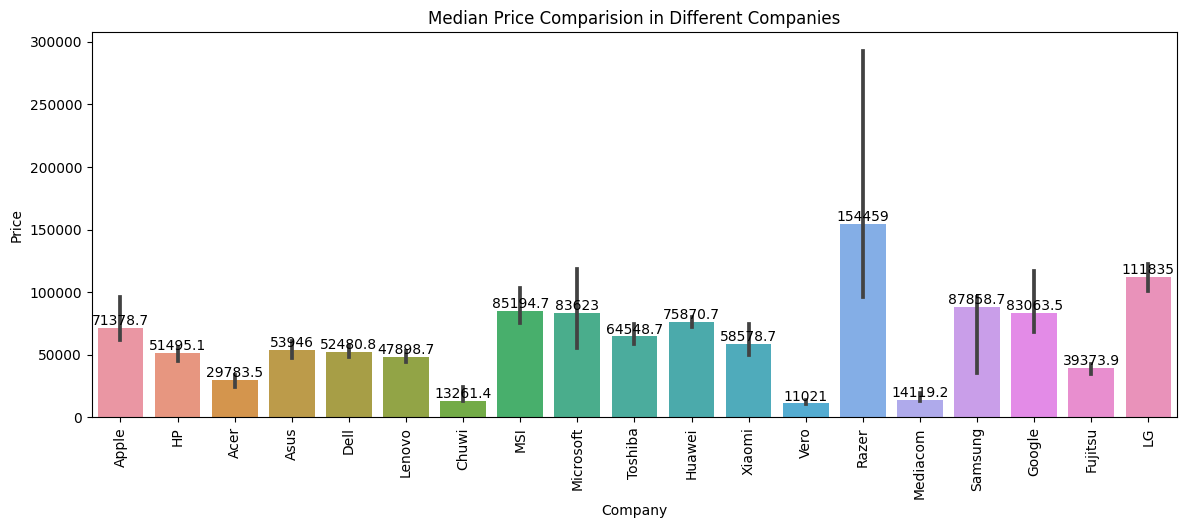

In [179]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x='Company',y='Price', data=data,estimator=np.median)
plt.xticks(rotation=90)
plt.title("Median Price Comparision in Different Companies")
for container in ax.containers:
    ax.bar_label(container)

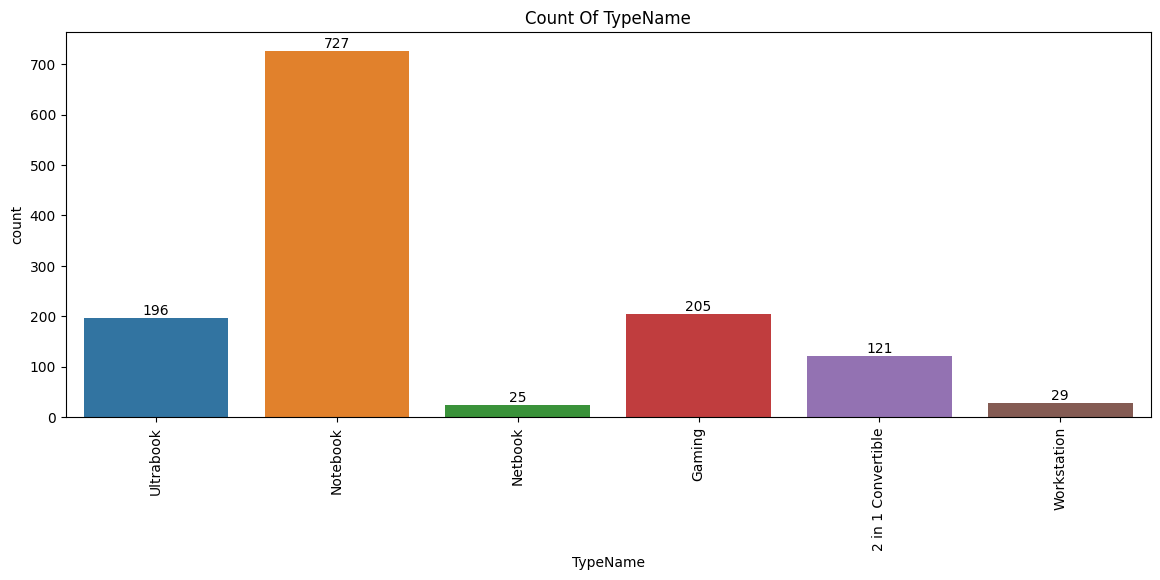

In [180]:
plt.figure(figsize=(14,5))
ax = sns.countplot(x='TypeName', data=data)
plt.xticks(rotation=90)
plt.title("Count Of TypeName")
for container in ax.containers:
    ax.bar_label(container)

- Most of Laptops are from Notebook which is widely used by students.
- Wherease,Gaming,Ultrabook laptops are not so much in quantity.
- Because it's costly and not much used majority of popularity.

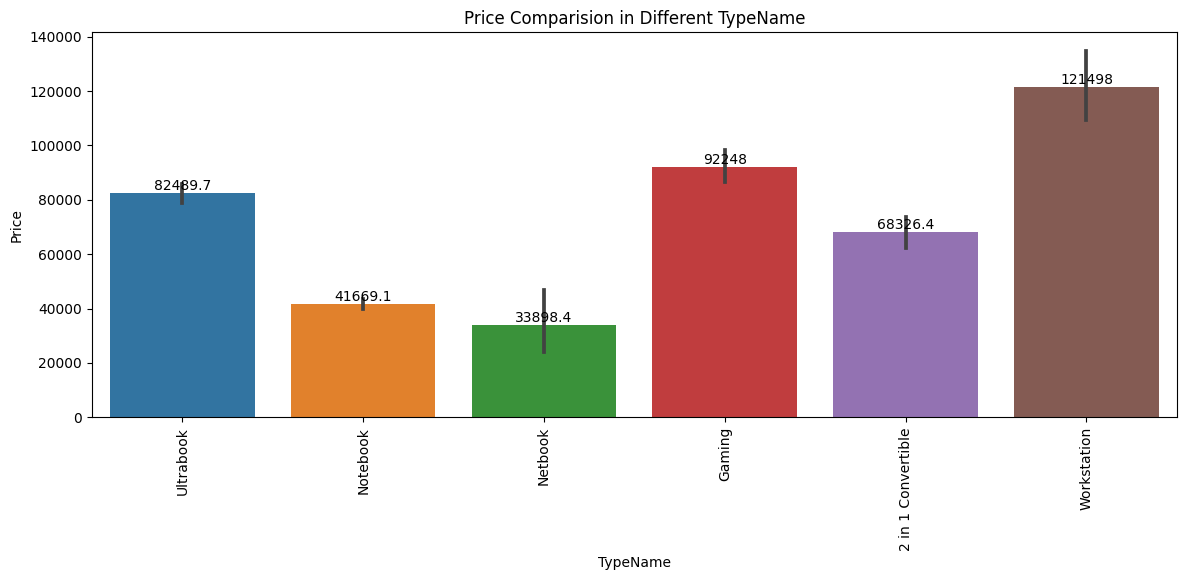

In [181]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x='TypeName',y='Price', data=data)
plt.xticks(rotation=90)
plt.title("Price Comparision in Different TypeName")
for container in ax.containers:
    ax.bar_label(container)

- Since we know notebook typename are used by student and its significantly lesser costly than the Gaming,Ultrabook,2 in 1 convertible & Workstation.
- Here Workstation and Gaming are costly

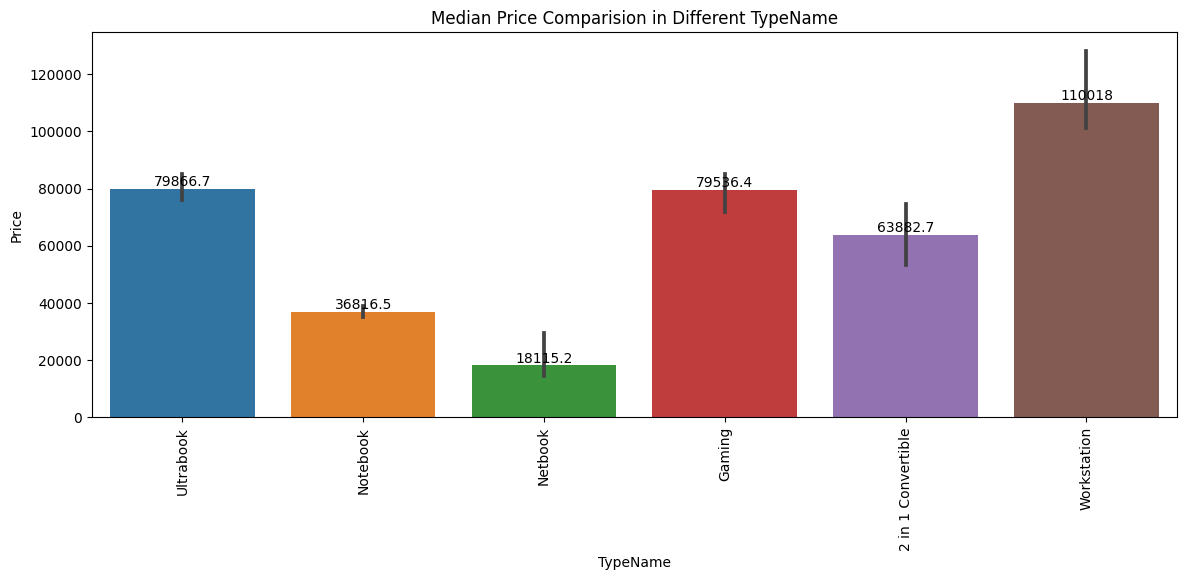

In [182]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x='TypeName',y='Price', data=data,estimator=np.median)
plt.xticks(rotation=90)
plt.title("Median Price Comparision in Different TypeName")
for container in ax.containers:
    ax.bar_label(container)

- Since Median estimation not showing difference between Gaming and Ultrabook
- But Workstation is still costly.

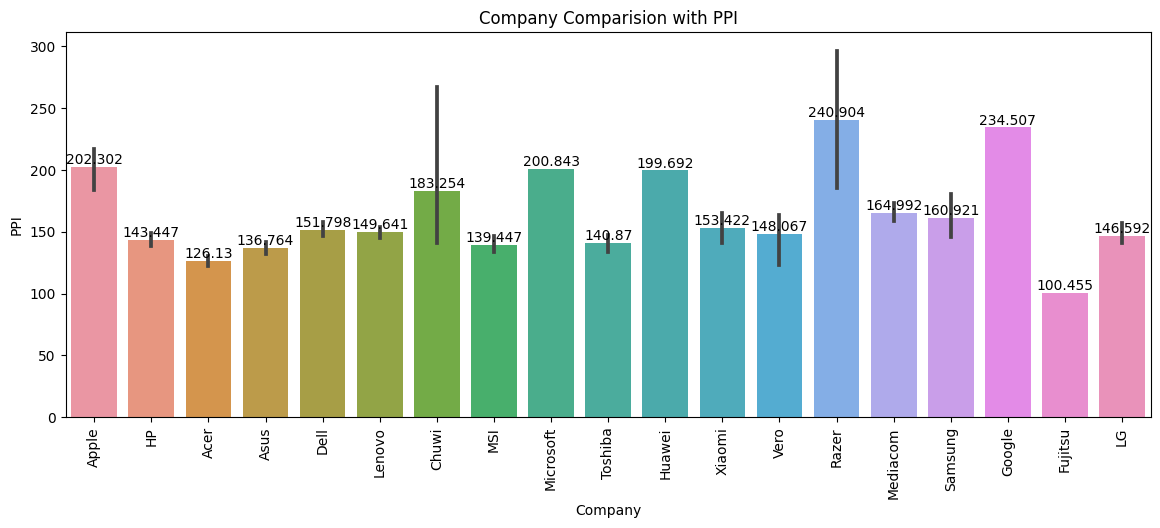

In [183]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x='Company',y=data['PPI'], data=data)
plt.xticks(rotation=90)
plt.title("Company Comparision with PPI")
for container in ax.containers:
    ax.bar_label(container)

- We can best comnies are providing best PPI than the our affortable laptop compnies like HP,Acer,Asus,Dell,Lenovo

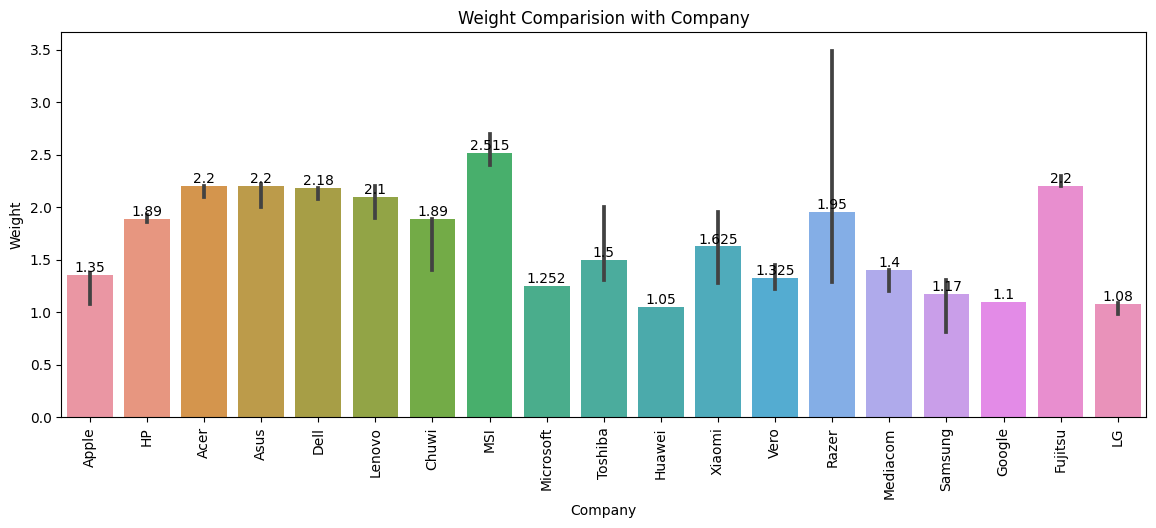

In [184]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x='Company',y=data['Weight'], data=data,estimator=np.median)
plt.xticks(rotation=90)
plt.title("Weight Comparision with Company")
for container in ax.containers:
    ax.bar_label(container)

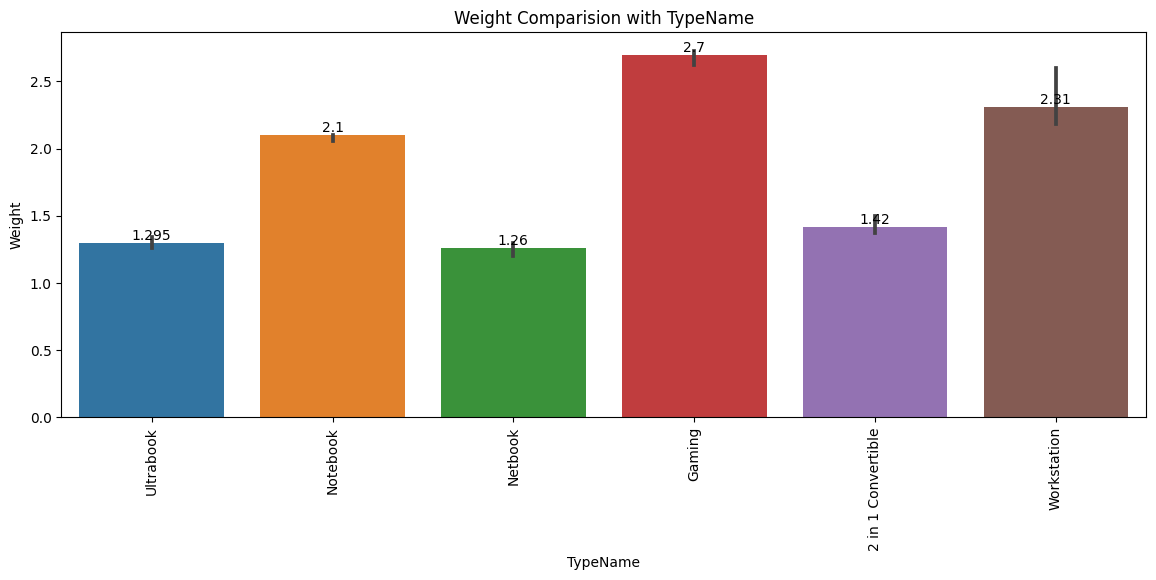

In [185]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x='TypeName',y=data['Weight'], data=data,estimator=np.median)
plt.xticks(rotation=90)
plt.title("Weight Comparision with TypeName")
for container in ax.containers:
    ax.bar_label(container)

- Most of Gamming laptops are heavy 
- Then workstation are also heavy

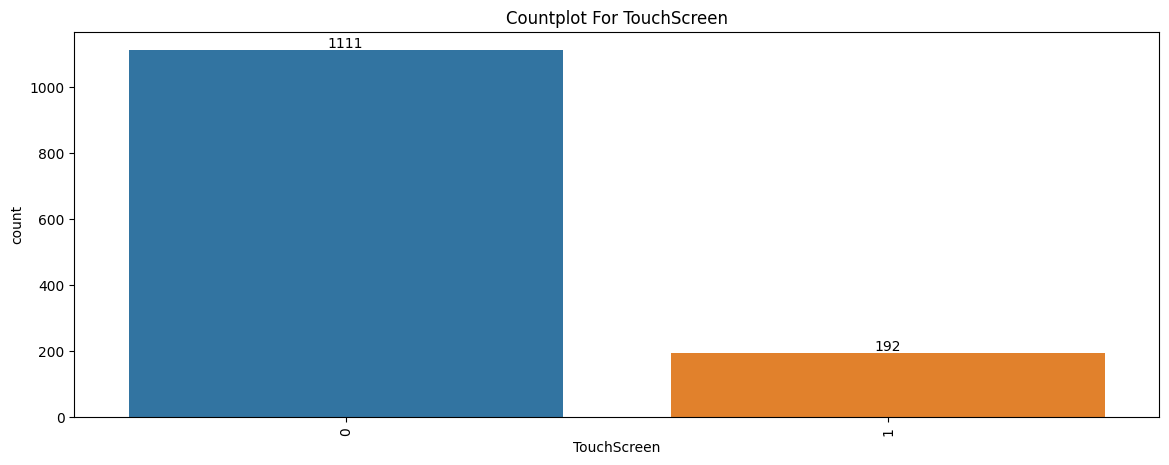

In [186]:
plt.figure(figsize=(14,5))
ax = sns.countplot(x='TouchScreen', data=data)
plt.xticks(rotation=90)
plt.title("Countplot For TouchScreen")
for container in ax.containers:
    ax.bar_label(container)

- There are very few laptops are touchscreen

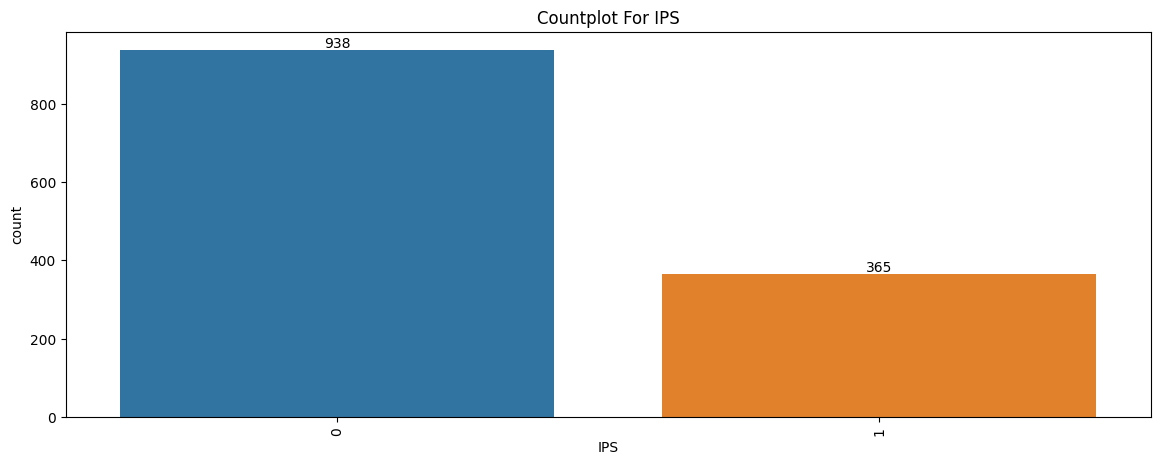

In [187]:
plt.figure(figsize=(14,5))
ax = sns.countplot(x='IPS', data=data)
plt.xticks(rotation=90)
plt.title("Countplot For IPS")
for container in ax.containers:
    ax.bar_label(container)

- There are very High laptops with IPS.

### TouchScreen Analysis

<AxesSubplot:>

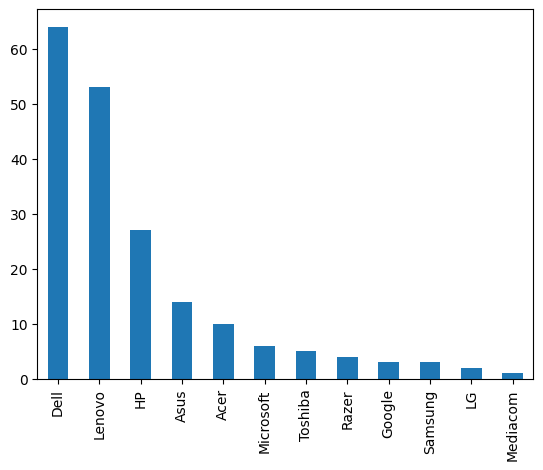

In [188]:
data[data['TouchScreen']==1]['Company'].value_counts().plot(kind='bar')

<AxesSubplot:>

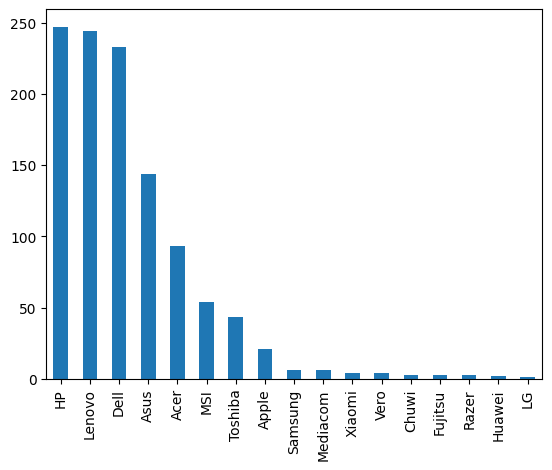

In [189]:
data[data['TouchScreen']==0]['Company'].value_counts().plot(kind='bar')

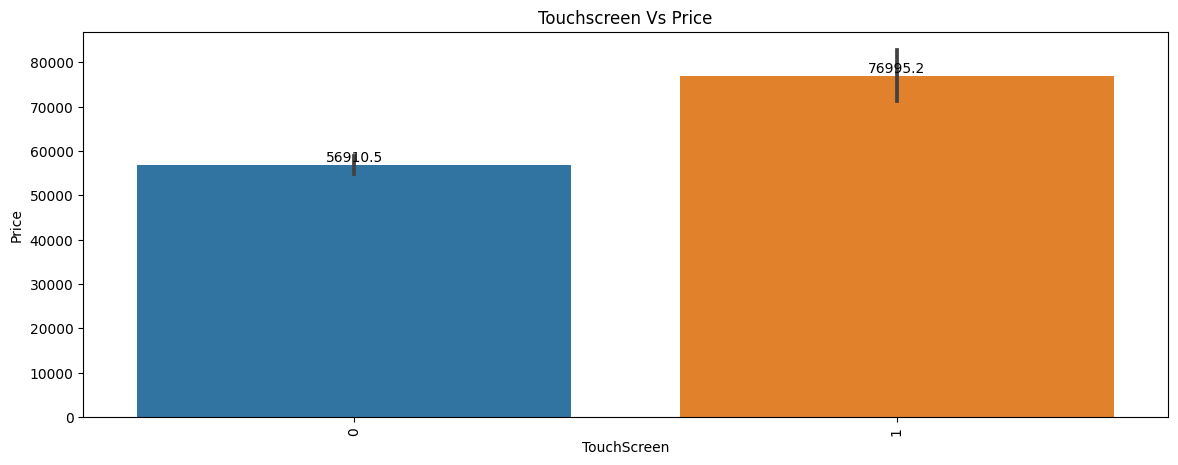

In [190]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x='TouchScreen',y='Price', data=data)
plt.xticks(rotation=90)
plt.title("Touchscreen Vs Price")
for container in ax.containers:
    ax.bar_label(container)

- TouchScreen Laptops are costly than the non-TouchScreen Laptops

### IPS Analysis

<AxesSubplot:>

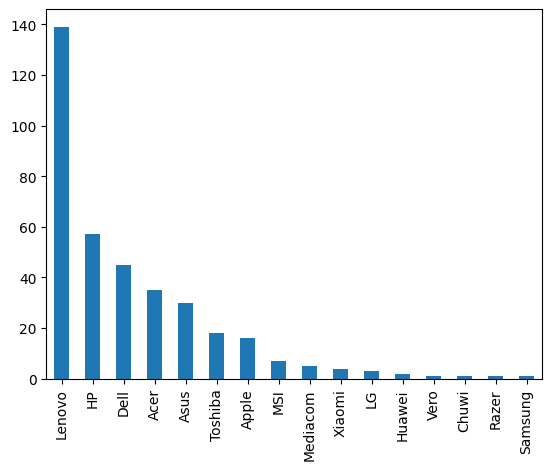

In [191]:
data[data['IPS']==1]['Company'].value_counts().plot(kind='bar')

<AxesSubplot:>

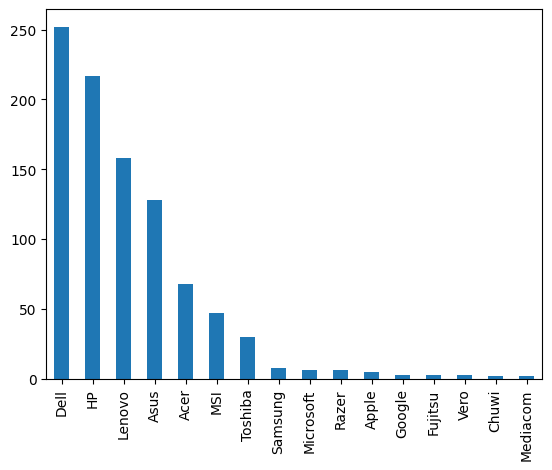

In [192]:
data[data['IPS']==0]['Company'].value_counts().plot(kind='bar')

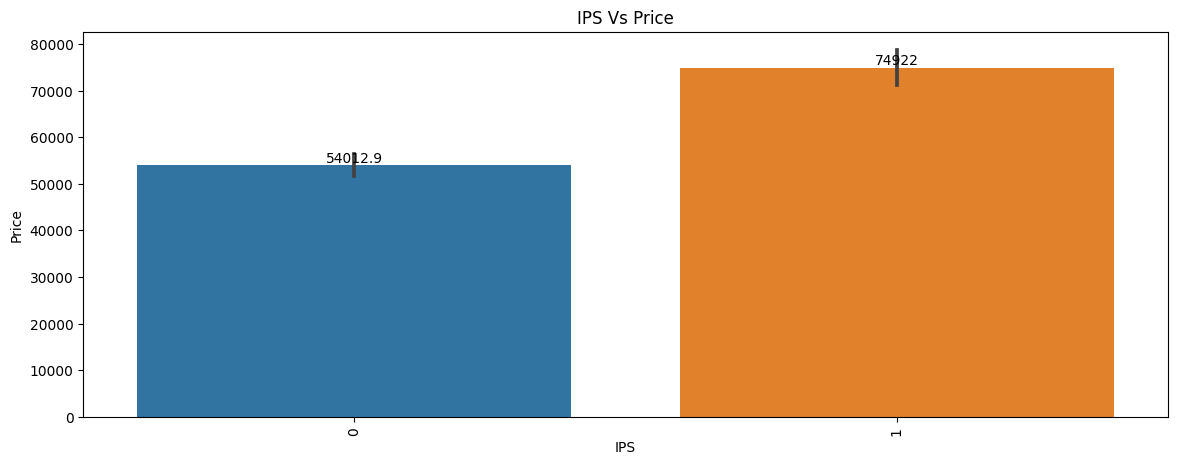

In [193]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x='IPS',y='Price', data=data)
plt.xticks(rotation=90)
plt.title("IPS Vs Price")
for container in ax.containers:
    ax.bar_label(container)

- Those laptops having IPS facilities are costly than the non-IPS laptops

### Price Analysis with its distribution and Relation 

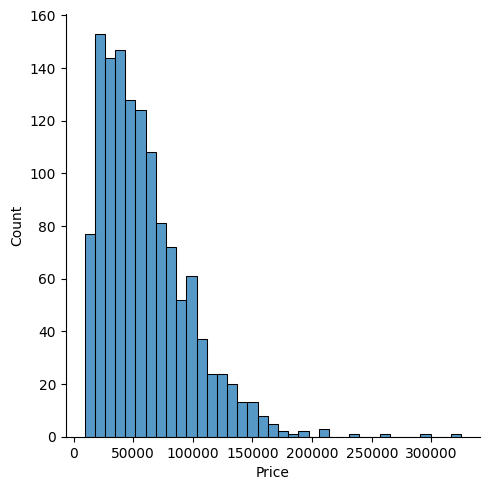

<AxesSubplot:xlabel='Price', ylabel='Density'>

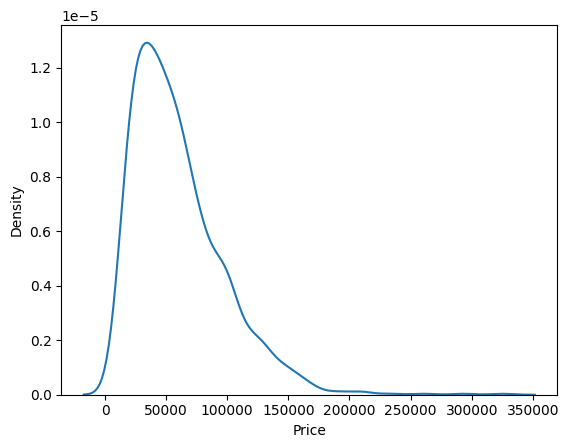

In [194]:
sns.displot(data['Price'])
plt.show()
sns.kdeplot(data['Price'])

Price is getting right skewed and showing that there are some outliers are avaliable

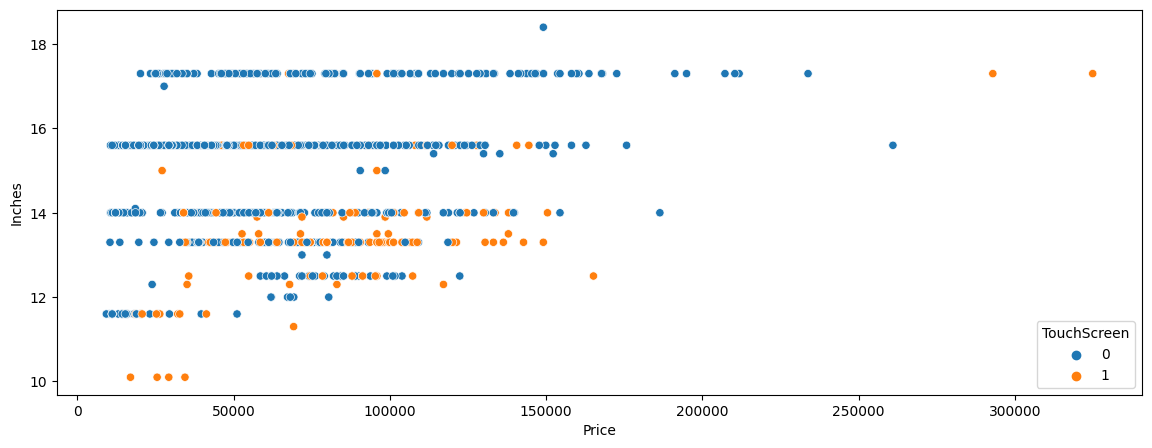

In [195]:
plt.figure(figsize=(14,5))
sns.scatterplot(x='Price',y='Inches',data=data,hue="TouchScreen")
plt.show()

- As the inches increase the price is also getting increase.
- Here,Touchscreen laptop having higher prices as well.

### Inches & Weight Distribution

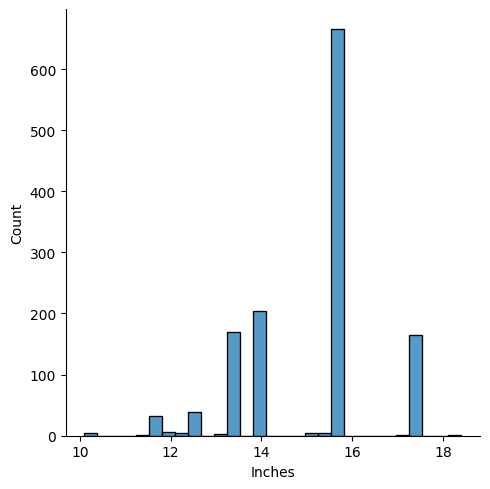

<AxesSubplot:xlabel='Inches', ylabel='Density'>

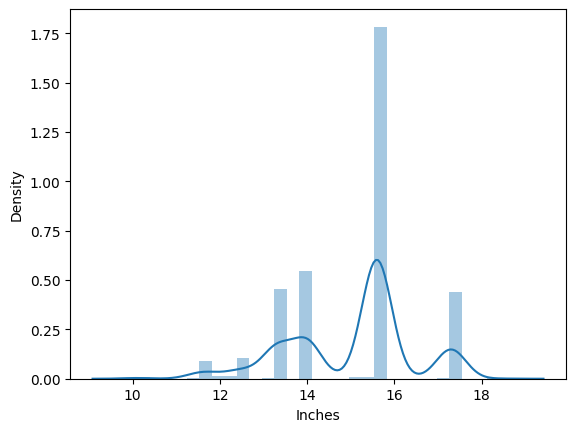

In [196]:
sns.displot(data['Inches'])
plt.show()
sns.distplot(data['Inches'])

- Majority of Inches in laptop are present inside the 15-16 inches

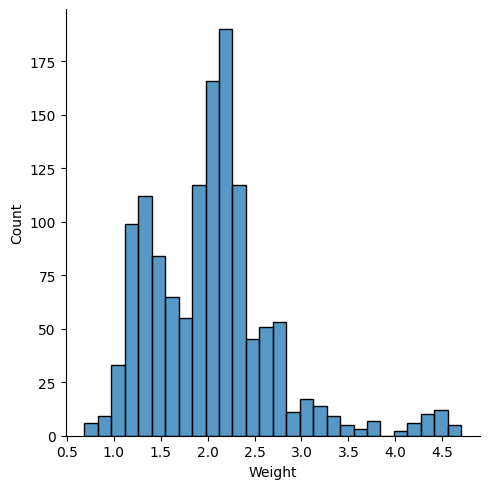

<AxesSubplot:xlabel='Weight', ylabel='Density'>

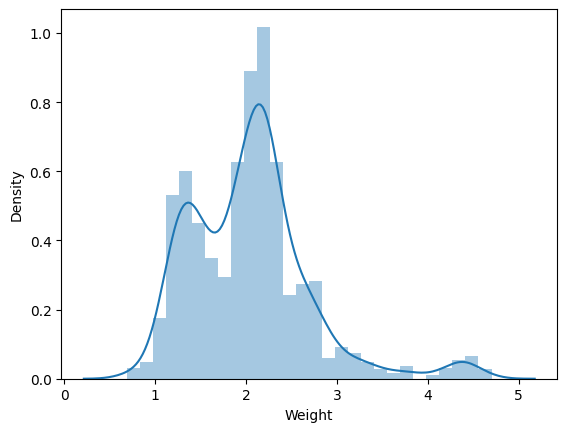

In [197]:
sns.displot(data['Weight'])
plt.show()
sns.distplot(data['Weight'])

- Majority of weight are present inside the range of 2 to 2.5 kg

- Now,we dont want the inches,X_res,Y_res

In [198]:
data.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [199]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,TouchScreen,IPS
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983002,0,1
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.212006,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534622,0,1
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983002,0,1


### CPU data understanding

In [200]:
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [201]:
data['Cpu Name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[:3]))

In [202]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,TouchScreen,IPS,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983002,0,1,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.212006,0,0,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534622,0,1,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983002,0,1,Intel Core i5


In [203]:
def fetch_processor(text):
    if text=="Intel Core i7" or text =='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=="Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [204]:
data['Cpu Name'] = data['Cpu Name'].apply(fetch_processor)

In [205]:
data.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,TouchScreen,IPS,Cpu Name
1009,HP,Notebook,Intel Core i3 7100U 2.4GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.64,36443.5200,111.935204,0,0,Intel Core i3
1190,Lenovo,Gaming,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,43636.3200,141.212006,0,1,Intel Core i5
534,Asus,Gaming,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.30,87858.7200,141.212006,0,1,Intel Core i5
413,Acer,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.60,42038.4528,165.632111,1,1,Intel Core i7
1004,Toshiba,Notebook,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.20,63669.6000,165.632111,0,0,Intel Core i5
175,Dell,Notebook,Intel Core i3 7100U 2.4GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,24455.5200,100.454666,0,0,Intel Core i3
719,HP,Notebook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.63,63936.0000,127.335678,0,0,Intel Core i7
550,Lenovo,Notebook,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.20,26586.7200,141.212006,0,0,Intel Core i3
470,HP,2 in 1 Convertible,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.29,106506.7200,331.264221,1,1,Intel Core i7
1048,Lenovo,Gaming,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.60,122010.6672,127.335678,0,1,Intel Core i7


In [206]:
data.drop(columns=['Cpu'],inplace=True)

In [207]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,TouchScreen,IPS,Cpu Name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983002,0,1,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.212006,0,0,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534622,0,1,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983002,0,1,Intel Core i5


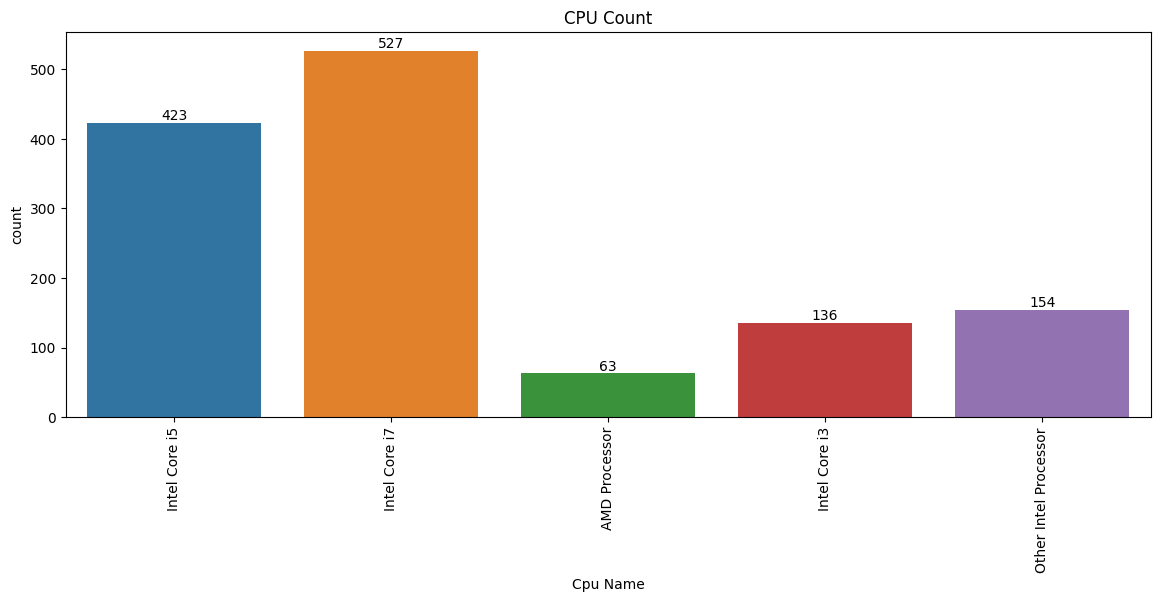

In [208]:
plt.figure(figsize=(14,5))
ax = sns.countplot(data['Cpu Name'], data=data)
plt.xticks(rotation=90)
plt.title("CPU Count")
for container in ax.containers:
    ax.bar_label(container)

- Intel Core I7 & I5 are mostly used and avaliable inside the data.

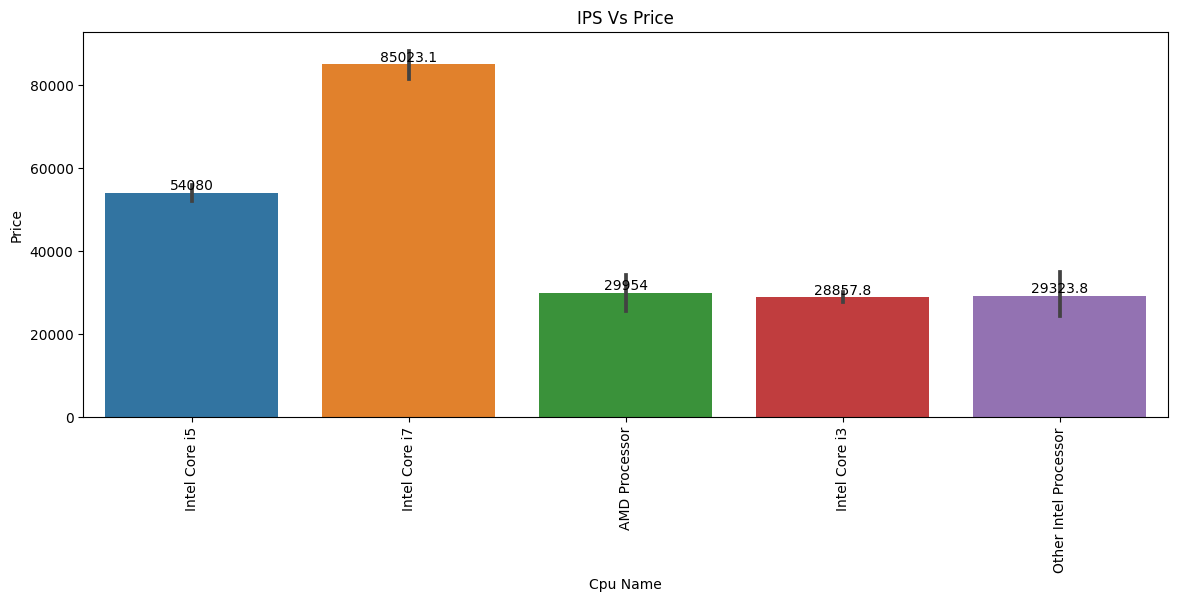

In [209]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x='Cpu Name',y='Price', data=data,estimator=np.mean)
plt.xticks(rotation=90)
plt.title("IPS Vs Price")
for container in ax.containers:
    ax.bar_label(container)

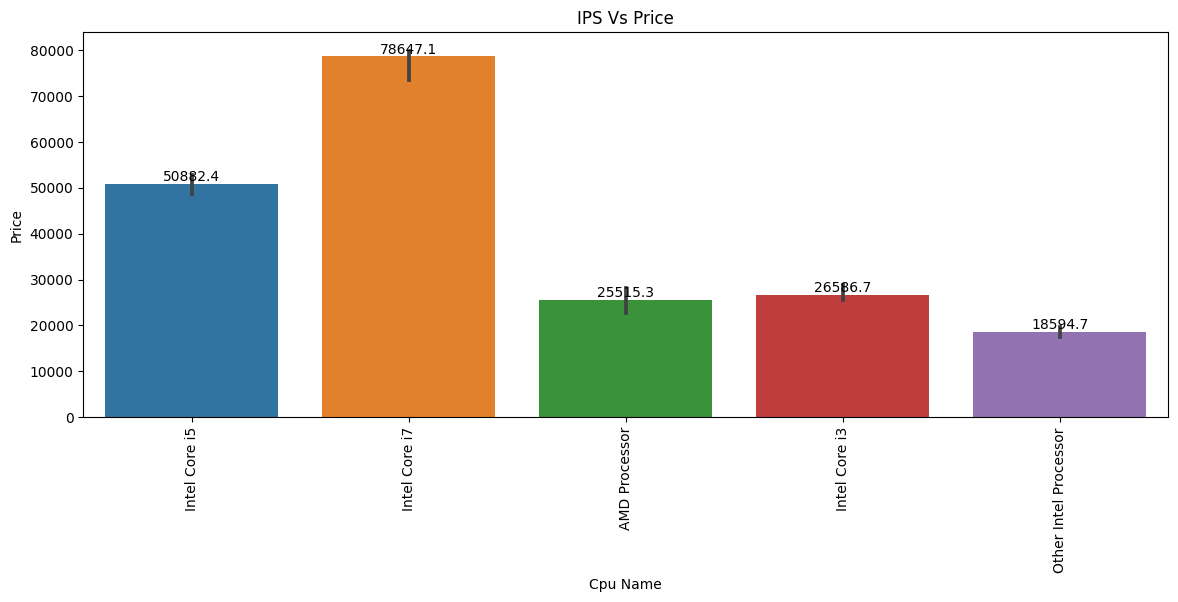

In [210]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x='Cpu Name',y='Price', data=data,estimator=np.median)
plt.xticks(rotation=90)
plt.title("IPS Vs Price")
for container in ax.containers:
    ax.bar_label(container)

- Mean and Medain price of the laptop are high in Intel core i7
- Then Intel I5 is costly

### Ram Data Uderstanding

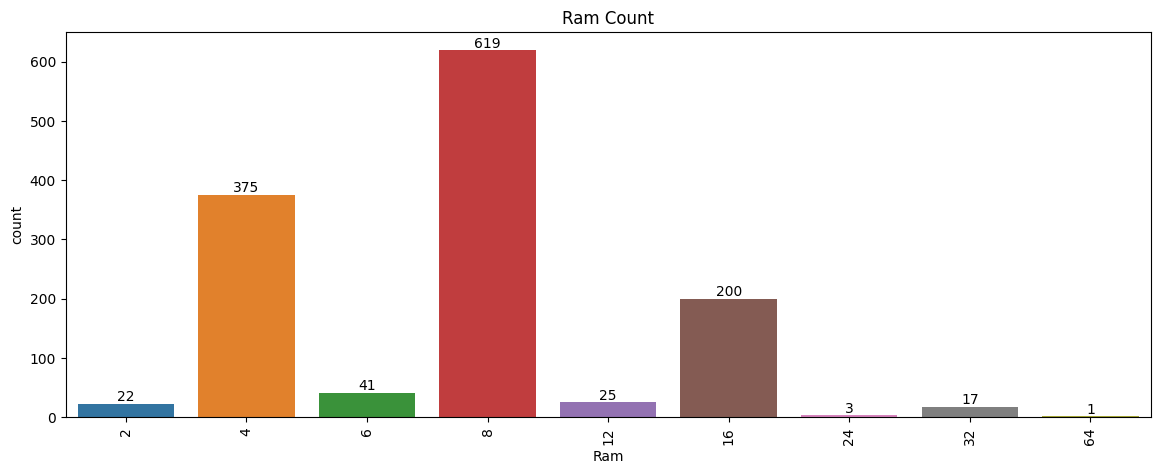

In [211]:
plt.figure(figsize=(14,5))
ax = sns.countplot(data['Ram'], data=data)
plt.xticks(rotation=90)
plt.title("Ram Count")
for container in ax.containers:
    ax.bar_label(container)

- 8GB Ram is mostly avaliable inside the laptop.

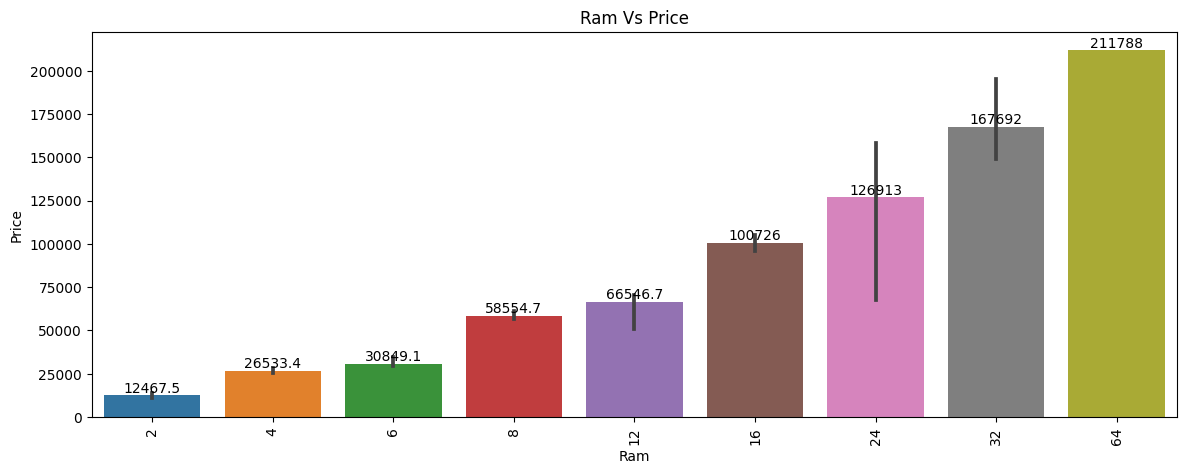

In [212]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x='Ram',y='Price', data=data,estimator=np.median)
plt.xticks(rotation=90)
plt.title("Ram Vs Price")
for container in ax.containers:
    ax.bar_label(container)

- As the ram increases the price of laptop is also getting incerase so from that we can say that there is linear relationship between price and Ram.

### Understanding The Memory Data

In [213]:
data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [214]:
data['Memory'] = data['Memory'].astype(str).replace('\.0','',regex=True)
data['Memory'] = data['Memory'].str.replace('GB','')
data['Memory'] = data['Memory'].str.replace('TB','000')

new = data['Memory'].str.split("+",n=1,expand=True)
data['first']=new[0]
data['first']=data['first'].str.strip()
data['Second']=new[1]



data['Layer1HDD']= data['first'].apply(lambda x:1 if "HDD" in x else 0)
data['Layer1SSD']= data['first'].apply(lambda x:1 if "SSD" in x else 0)
data['Layer1Hybrid']= data['first'].apply(lambda x:1 if "Hybrid" in x else 0)
data['Layer1Flash_Storage']= data['first'].apply(lambda x:1 if "Flash Storage" in x else 0)

data['first']=data['first'].str.replace(r"\D",'')
data['Second'].fillna("0",inplace=True)

data['Layer2HDD']= data['Second'].apply(lambda x:1 if "HDD" in x else 0)
data['Layer2SSD']= data['Second'].apply(lambda x:1 if "SSD" in x else 0)
data['Layer2Hybrid']= data['Second'].apply(lambda x:1 if "Hybrid" in x else 0)
data['Layer2Flash_Storage']= data['Second'].apply(lambda x:1 if "Flash Storage" in x else 0)

data['Second']=data['Second'].str.replace(r"\D",'')

data['first']=data['first'].astype(int)
data['Second']=data['Second'].astype(int)

data['HDD'] = (data['first']*data['Layer1HDD']+data['Second']*data['Layer2HDD'])
data['SDD'] = (data['first']*data['Layer1SSD']+data['Second']*data['Layer2SSD'])
data['Hybrid'] = (data['first']*data['Layer1Hybrid']+data['Second']*data['Layer2Hybrid'])
data['Flash_Storage'] = (data['first']*data['Layer1Flash_Storage']+data['Second']*data['Layer2Flash_Storage'])

In [215]:
data.drop(columns=['first','Second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

In [216]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,TouchScreen,IPS,Cpu Name,HDD,SDD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983002,0,1,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.212006,0,0,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534622,0,1,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983002,0,1,Intel Core i5,0,256,0,0


In [217]:
data.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,TouchScreen,IPS,Cpu Name,HDD,SDD,Hybrid,Flash_Storage
713,Asus,Notebook,4,32 Flash Storage,Intel HD Graphics 500,Windows 10,1.50,15877.44,157.350510,0,0,Other Intel Processor,0,0,0,32
1066,Asus,Gaming,64,1000 SSD,Nvidia GeForce GTX 980,Windows 10,3.58,211788.00,127.335678,0,1,Intel Core i7,0,1000,0,0
1165,Dell,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,79813.44,282.424011,0,0,Intel Core i7,1000,128,0,0
83,Lenovo,Notebook,4,128 SSD,AMD R4 Graphics,Windows 10,2.20,21258.72,141.212006,0,0,AMD Processor,0,128,0,0
661,Lenovo,Notebook,4,500 HDD,Intel HD Graphics 500,Windows 10,2.20,22324.32,100.454666,0,0,Other Intel Processor,500,0,0,0
792,Lenovo,2 in 1 Convertible,8,512 SSD,Intel HD Graphics 620,Windows 10,1.37,104961.60,165.632111,1,1,Intel Core i7,0,512,0,0
890,HP,Notebook,4,128 SSD,Intel HD Graphics 620,Windows 10,1.95,67399.20,157.350510,0,0,Intel Core i5,0,128,0,0
385,Lenovo,Ultrabook,8,512 SSD,Intel HD Graphics 620,Windows 10,1.13,121584.96,209.800690,0,1,Intel Core i7,0,512,0,0
1225,Asus,Notebook,4,1000 HDD,Intel HD Graphics 405,Windows 10,2.65,16463.52,100.454666,0,0,Other Intel Processor,1000,0,0,0
590,Asus,2 in 1 Convertible,8,1000 HDD,Intel HD Graphics 520,Windows 10,2.20,39373.92,100.454666,1,0,Intel Core i5,1000,0,0,0


In [218]:
data.drop(columns=['Memory'],inplace=True)

In [219]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,PPI,TouchScreen,IPS,Cpu Name,HDD,SDD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983002,0,1,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,141.212006,0,0,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534622,0,1,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983002,0,1,Intel Core i5,0,256,0,0


In [220]:
data.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
PPI              0.473487
TouchScreen      0.191226
IPS              0.252208
HDD             -0.096441
SDD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

- Since,we are able to get the higher correlation with SSD & price
- Whereas negetive correlation with HDD
- Wherease the Hybrid and Flash_Storage not showing so much important inside the price prediction so we are going to drop them.

In [221]:
data.drop(columns=['Flash_Storage','Hybrid'],inplace=True)

### GPU data understanding

In [222]:
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [223]:
data['Gpu']=data['Gpu'].apply(lambda x: x.split()[:1][0])

In [224]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,PPI,TouchScreen,IPS,Cpu Name,HDD,SDD
0,Apple,Ultrabook,8,Intel,macOS,1.37,71378.6832,226.983002,0,1,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,0,0
2,HP,Notebook,8,Intel,No OS,1.86,30636.0000,141.212006,0,0,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD,macOS,1.83,135195.3360,220.534622,0,1,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel,macOS,1.37,96095.8080,226.983002,0,1,Intel Core i5,0,256


In [225]:
data['Gpu'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu, dtype: int64

In [226]:
data= data[~(data['Gpu']=='ARM')]

In [227]:
data.Gpu.value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu, dtype: int64

In [228]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,PPI,TouchScreen,IPS,Cpu Name,HDD,SDD
0,Apple,Ultrabook,8,Intel,macOS,1.37,71378.6832,226.983002,0,1,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,0,0
2,HP,Notebook,8,Intel,No OS,1.86,30636.0000,141.212006,0,0,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD,macOS,1.83,135195.3360,220.534622,0,1,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel,macOS,1.37,96095.8080,226.983002,0,1,Intel Core i5,0,256


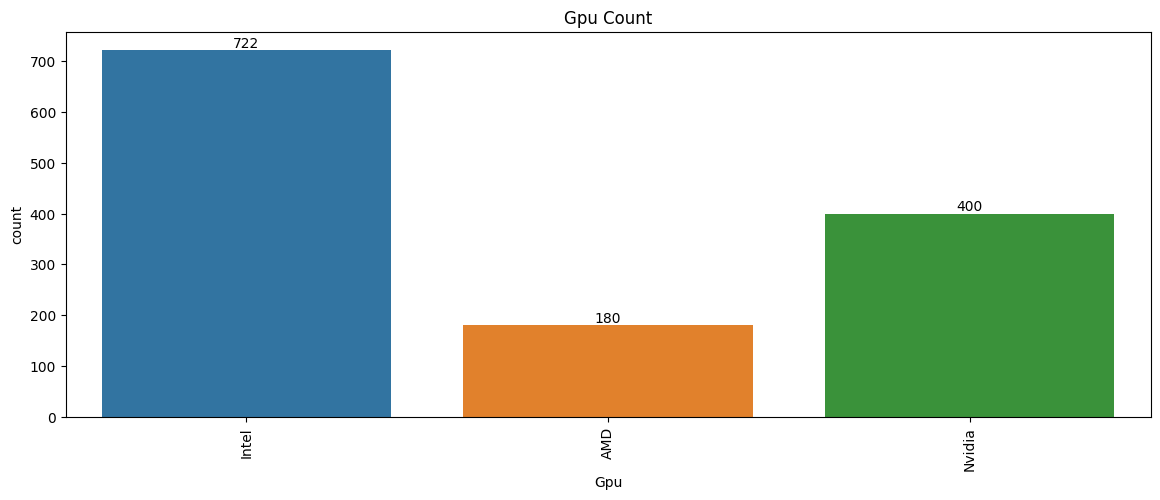

In [229]:
plt.figure(figsize=(14,5))
ax = sns.countplot(data['Gpu'], data=data)
plt.xticks(rotation=90)
plt.title("Gpu Count")
for container in ax.containers:
    ax.bar_label(container)

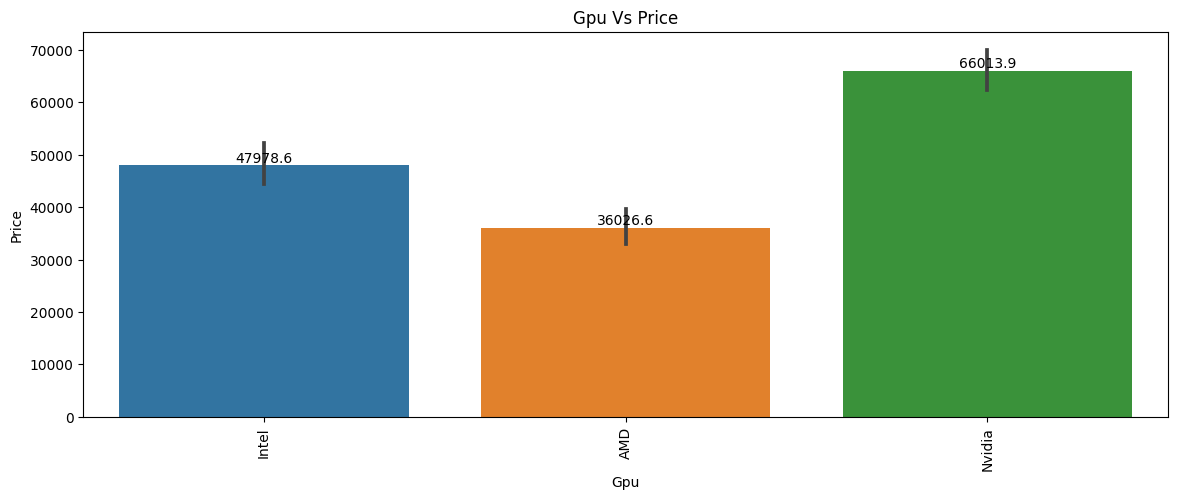

In [230]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x='Gpu',y='Price', data=data,estimator=np.median)
plt.xticks(rotation=90)
plt.title("Gpu Vs Price")
for container in ax.containers:
    ax.bar_label(container)

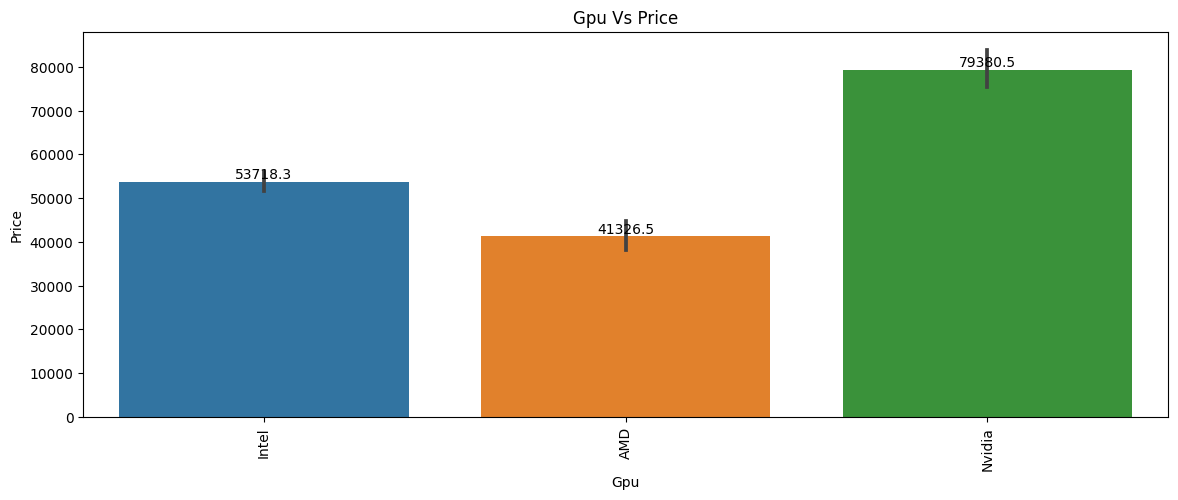

In [231]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x='Gpu',y='Price', data=data)
plt.xticks(rotation=90)
plt.title("Gpu Vs Price")
for container in ax.containers:
    ax.bar_label(container)

### Lets Understand the OS data

In [232]:
data.OpSys.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

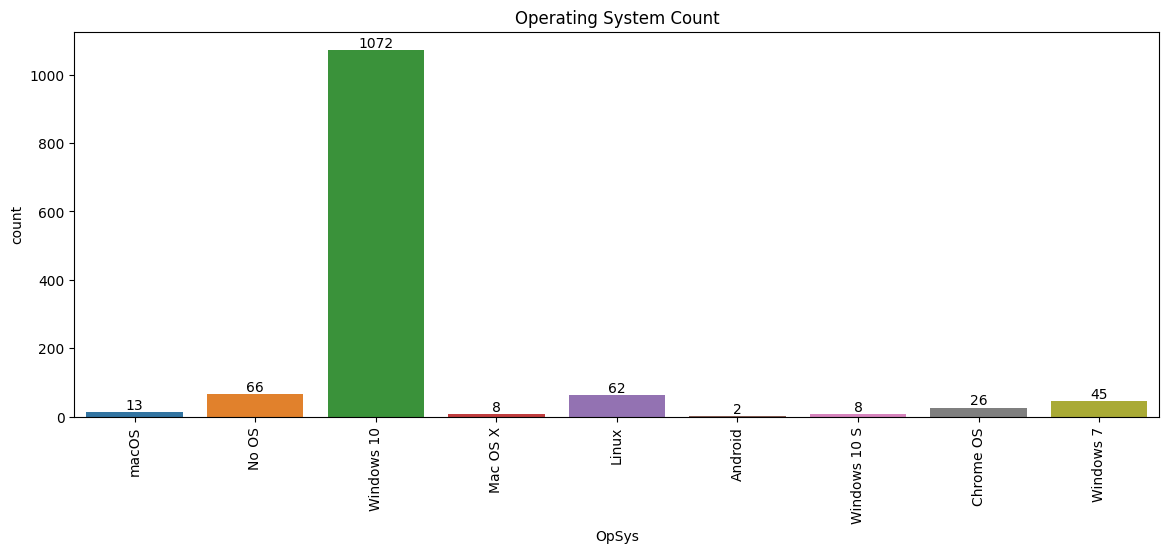

In [233]:
plt.figure(figsize=(14,5))
ax = sns.countplot(data['OpSys'], data=data)
plt.xticks(rotation=90)
plt.title("Operating System Count")
for container in ax.containers:
    ax.bar_label(container)

In [234]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [235]:
def cat_os(inp):
    if inp =="Windows 10" or inp =="Windows 7" or inp =="Windows 10 S":
        return 'Windows'
    elif inp=='macOS' or inp=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [236]:
data['OpSys']=data['OpSys'].apply(cat_os)

In [237]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,PPI,TouchScreen,IPS,Cpu Name,HDD,SDD
0,Apple,Ultrabook,8,Intel,Mac,1.37,71378.6832,226.983002,0,1,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel,Mac,1.34,47895.5232,127.677940,0,0,Intel Core i5,0,0
2,HP,Notebook,8,Intel,Others/No OS/Linux,1.86,30636.0000,141.212006,0,0,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD,Mac,1.83,135195.3360,220.534622,0,1,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel,Mac,1.37,96095.8080,226.983002,0,1,Intel Core i5,0,256


### Lets Understand the Correlation.

In [238]:
corrmat = data.corr()
corrmat

,Ram,Weight,Price,PPI,TouchScreen,IPS,HDD,SDD
Ram,1.000000,0.383362,0.742905,0.305688,0.118875,0.207949,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.321883,-0.293004,0.018643,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.475368,0.192917,0.253320,-0.096891,0.670660
PPI,0.305688,-0.321883,0.475368,1.000000,0.458571,0.299142,-0.294698,0.509437
TouchScreen,0.118875,-0.293004,0.192917,0.458571,1.000000,0.148026,-0.208766,0.257577
IPS,0.207949,0.018643,0.253320,0.299142,0.148026,1.000000,-0.093588,0.225311
HDD,0.095808,0.514147,-0.096891,-0.294698,-0.208766,-0.093588,1.000000,-0.400750
SDD,0.603379,-0.063818,0.670660,0.509437,0.257577,0.225311,-0.400750,1.000000


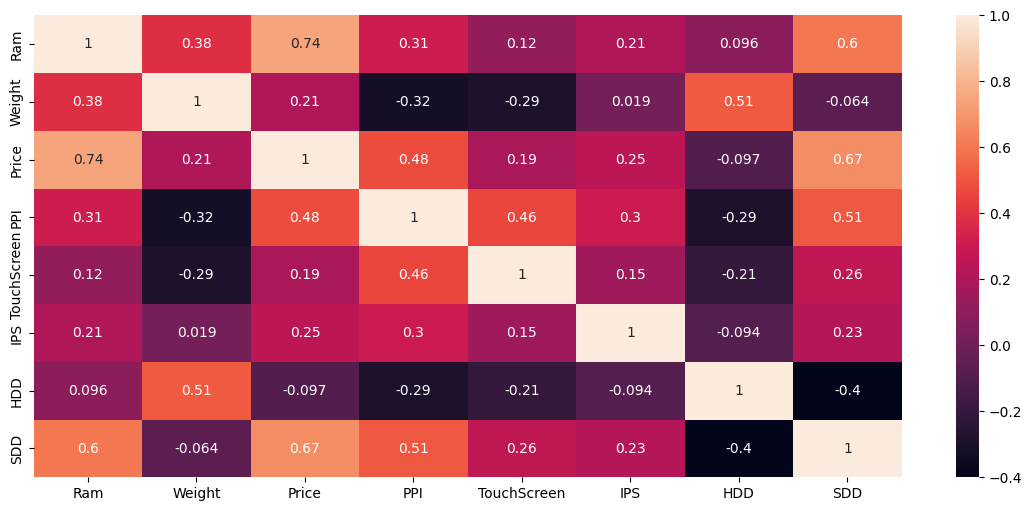

In [239]:
plt.figure(figsize=(14,6))
sns.heatmap(corrmat,annot=True)
plt.show()

## Since we have skewed data for price so lets normalise that one.

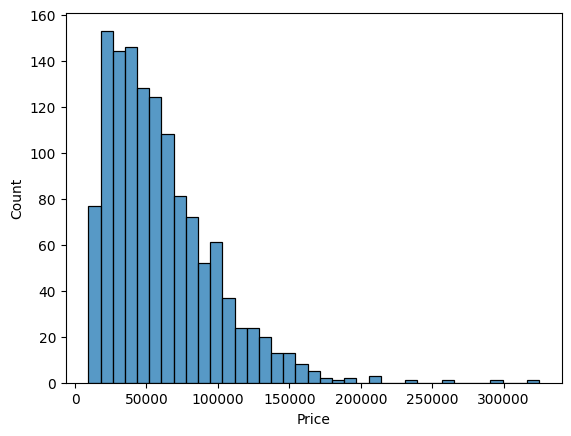

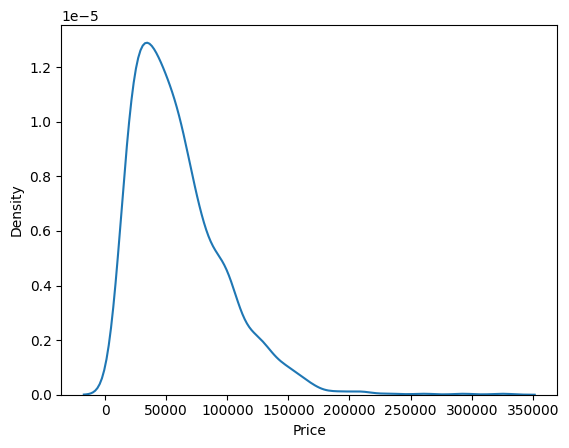

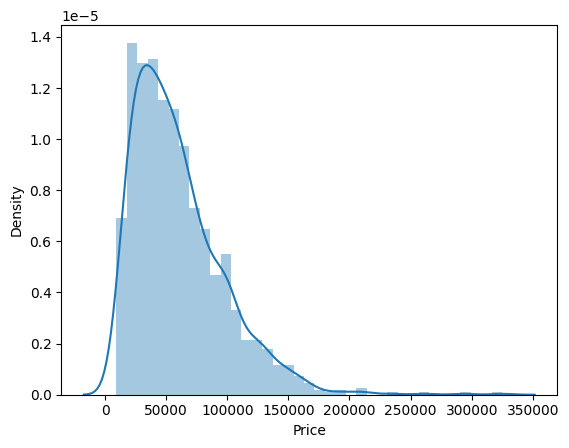

In [240]:
sns.histplot(data['Price'])
plt.show()
sns.kdeplot(data['Price'])
plt.show()
sns.distplot(data['Price'])
plt.show()

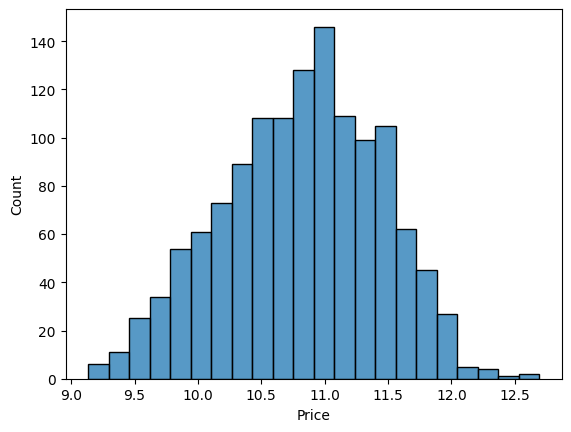

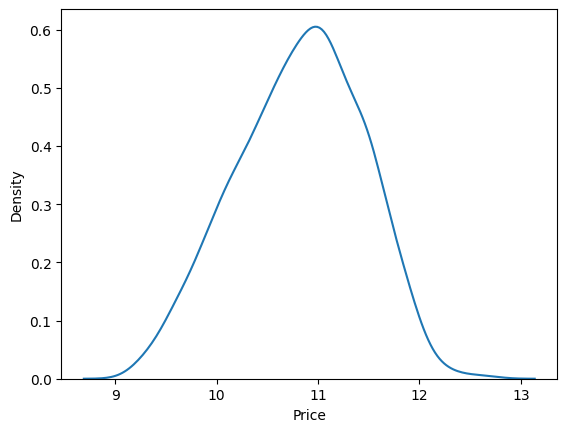

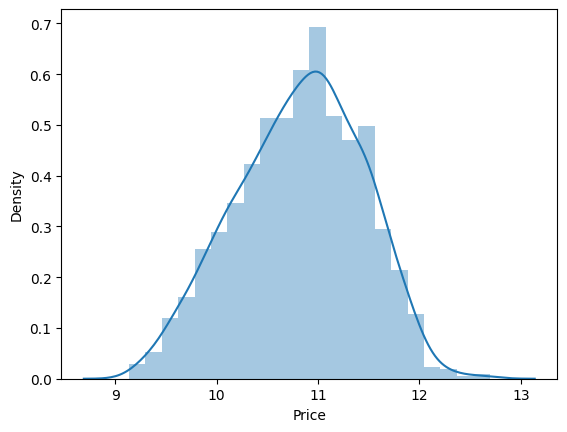

In [241]:
sns.histplot(np.log(data['Price']))
plt.show()
sns.kdeplot(np.log(data['Price']))
plt.show()
sns.distplot(np.log(data['Price']))
plt.show()

### Lets Understand Statsmodel

In [242]:
data.head(1)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,PPI,TouchScreen,IPS,Cpu Name,HDD,SDD
0,Apple,Ultrabook,8,Intel,Mac,1.37,71378.6832,226.983002,0,1,Intel Core i5,0,128


In [243]:
import statsmodels.api as sm

In [244]:
xx = data[['Ram','Weight','PPI','TouchScreen','IPS','HDD','SDD']]
yy = np.log(data['Price'])

In [245]:
xx = sm.add_constant(xx)

In [246]:
model = sm.OLS(yy,xx).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     283.5
Date:                Sat, 24 Sep 2022   Prob (F-statistic):          5.39e-256
Time:                        18:16:00   Log-Likelihood:                -627.71
No. Observations:                1302   AIC:                             1271.
Df Residuals:                    1294   BIC:                             1313.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.5586      0.066    143.849      0.000       9.428       9.689
Ram             0.0458      0.003     13.652      0.000       0.039       0.052
Weight          0.0756      0.023      3.273      0.001       0.030       0.121
PPI             0.0033      0.000      9.501      0.000       0.003       0.004
TouchScreen    -0.0245      0.035     -0.693      0.488      -0.094       0.045
IPS             0.0943      0.026      3.658      0.000       0.044       0.145
HDD           3.71e-05   2.82e-05      1.314      0.189   -1.83e-05    9.25e-05
SDD             0.0011   9.39e-05     11.539      0.000       0.001       0.001
==============================================================================
Omnibus:                       15.486   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.992
Skew:                          -0.173   Prob(JB):                     7.51e-05
Kurtosis:                       3.480   Cond. No.                     4.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- From the above we can see that HDD and TouchScreen are not adding good informaton for predicting the price and our adjusted R2 score is about 0.60 and R2 also 0.60.

## Lets Build the Machine Learning Model.

In [247]:
x = data.drop(columns=['Price'])
y = np.log(data['Price'])

In [248]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [249]:
X_train.shape,X_test.shape

((1041, 12), (261, 12))

In [250]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [251]:
X_train.head(1)

,Company,TypeName,Ram,Gpu,OpSys,Weight,PPI,TouchScreen,IPS,Cpu Name,HDD,SDD
271,Asus,Gaming,16,AMD,Windows,3.2,127.335678,0,0,AMD Processor,1000,256


### Linear Regression

In [252]:
step1=ColumnTransformer(transformers=[('Col_tnf',OneHotEncoder(sparse=False,drop="first"),[0,1,3,4,9])],remainder='passthrough')
step2 = LinearRegression()

pipe_lr = Pipeline([('step1',step1),('step2',step2)])
pipe_lr.fit(X_train,y_train)
y_pred = pipe_lr.predict(X_test)
print('R2-Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2-Score 0.8219119370382798
MAE 0.20084501800174823


### Ridge Regression

In [253]:
step1=ColumnTransformer(transformers=[('Col_tnf',OneHotEncoder(sparse=False,drop="first"),[0,1,3,4,9])],remainder='passthrough')
step2 = Ridge(alpha=10)

pipe_ridge = Pipeline([('step1',step1),('step2',step2)])
pipe_ridge.fit(X_train,y_train)
y_pred = pipe_ridge.predict(X_test)
print('R2-Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2-Score 0.8152320648701015
MAE 0.20595550530411114


### KNN

In [254]:
step1=ColumnTransformer(transformers=[('Col_tnf',OneHotEncoder(sparse=False,drop="first"),[0,1,3,4,9])],remainder='passthrough')
step2 = KNeighborsRegressor(n_neighbors=3)

pipe_knn = Pipeline([('step1',step1),('step2',step2)])
pipe_knn.fit(X_train,y_train)
y_pred = pipe_knn.predict(X_test)
print('R2-Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2-Score 0.728744841566983
MAE 0.23309026099655186


### Decision Tree

In [255]:
step1=ColumnTransformer(transformers=[('Col_tnf',OneHotEncoder(sparse=False,drop="first"),[0,1,3,4,9])],remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=8)

pipe_Decision= Pipeline([('step1',step1),('step2',step2)])
pipe_Decision.fit(X_train,y_train)
y_pred = pipe_Decision.predict(X_test)
print('R2-Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2-Score 0.7860373231292621
MAE 0.2092899886108563


### RamdomForest

In [256]:
step1=ColumnTransformer(transformers=[('Col_tnf',OneHotEncoder(sparse=False,drop="first"),[0,1,3,4,9])],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe_RandForest= Pipeline([('step1',step1),('step2',step2)])
pipe_RandForest.fit(X_train,y_train)
y_pred = pipe_RandForest.predict(X_test)
print('R2-Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2-Score 0.8715067778453776
MAE 0.16713214983739585


### AdaBoost

In [257]:
step1=ColumnTransformer(transformers=[('Col_tnf',OneHotEncoder(sparse=False,drop="first"),[0,1,3,4,9])],remainder='passthrough')
step2 = AdaBoostRegressor(n_estimators=100,learning_rate=0.25)

pipe_add= Pipeline([('step1',step1),('step2',step2)])
pipe_add.fit(X_train,y_train)
y_pred = pipe_add.predict(X_test)
print('R2-Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2-Score 0.7998773479149556
MAE 0.21764854613718235


### XgBoost

In [258]:
step1=ColumnTransformer(transformers=[('Col_tnf',OneHotEncoder(sparse=False,drop="first"),[0,1,3,4,9])],remainder='passthrough')
step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe_Xg= Pipeline([('step1',step1),('step2',step2)])
pipe_Xg.fit(X_train,y_train)
y_pred = pipe_Xg.predict(X_test)
print('R2-Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2-Score 0.8840415737730007
MAE 0.15594740865857076


### GradientBoost

In [259]:
step1=ColumnTransformer(transformers=[('Col_tnf',OneHotEncoder(sparse=False,drop="first"),[0,1,3,4,9])],remainder='passthrough')
step2 = GradientBoostingRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe_gbdt= Pipeline([('step1',step1),('step2',step2)])
pipe_gbdt.fit(X_train,y_train)
y_pred = pipe_gbdt.predict(X_test)
print('R2-Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2-Score 0.8632283120183388
MAE 0.16505309783048056


### Voting Regressor

In [262]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1=ColumnTransformer(transformers=[('Col_tnf',OneHotEncoder(sparse=False,drop="first"),[0,1,3,4,9])],remainder='passthrough')
step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

rf = RandomForestRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=15,bootstrap=True)
gbdt =GradientBoostingRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
xgb = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
lr = LinearRegression()
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([("rf",rf),('gbdt',gbdt),('xgb',xgb),('et',et)],weights=[5,1,1,1])

pipe_vote= Pipeline([('step1',step1),('step2',step2)])
pipe_vote.fit(X_train,y_train)
y_pred = pipe_vote.predict(X_test)
print('R2-Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2-Score 0.8846911421983767
MAE 0.15651229944823272


### StackingRegressor

In [264]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1=ColumnTransformer(transformers=[('Col_tnf',OneHotEncoder(sparse=False,drop="first"),[0,1,3,4,9])],remainder='passthrough')
step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

estimators=[
('rf',RandomForestRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=15,bootstrap=True)),
('gbdt' ,GradientBoostingRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)),
("xgb",XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)),
('lr', LinearRegression()),
('et', ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10,bootstrap=True))]

step2 = StackingRegressor(estimators=estimators,final_estimator=Ridge(alpha=100))

pipe_stack= Pipeline([('step1',step1),('step2',step2)])
pipe_stack.fit(X_train,y_train)
y_pred = pipe_stack.predict(X_test)
print('R2-Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2-Score 0.888496458207969
MAE 0.15624572510114065


### Exporting The Model

In [265]:
import pickle
pickle.dump(data,open('df.pkl','wb'))
pickle.dump(pipe_stack,open("model.pkl",'wb'))

### Thank You !!